<a href="https://colab.research.google.com/github/colafishx/190826PyETL/blob/master/twStockAnnPrice_twse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# convert TW date to AD date
def convDate(date):
  strD = str(date)
  strY = strD[:3] # get the TW year
  yearAD = str(int(strY)+1911) #transfer to AD year
  dateAD = yearAD + strD[4:6] + strD[7:9]
  return dateAD

In [0]:
def month(n):
  if n < 10:
    n = str(0) + str(n)
  else:
    n = str(n)
  return n

In [13]:
import requests
import json, csv
import pandas as pd
import os
import time

pd.options.mode.chained_assignment = None

stocknum=str(int(input()))
filePath = 'stockyear'+stocknum+'.csv'
urlH = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2019'
urlM = '01&stockNo='
urlT = '&_=1575622582164'
if not os.path.isfile(filePath):
  for n in range(1,13):
    url_twse = urlH + month(n) + urlM + stocknum + urlT
    print(url_twse)
    res = requests.get(url_twse)
    jdata = json.loads(res.text)
    print(jdata)

    outputFile = open(filePath, 'a', newline='', encoding='utf-8-sig')
    outputWriter = csv.writer(outputFile)
    if n == 1:
      outputWriter.writerow(jdata['fields'])
    for dataline in (jdata['data']):
      outputWriter.writerow(dataline)
    time.sleep(0.5)
  outputFile.close()

2317


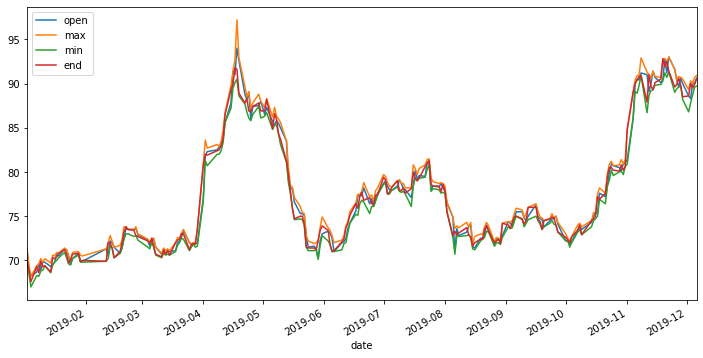

In [14]:
colnames = ["date","shrsTrd","amtTrd","open","max","min","end","var","#Trd"]
pdstock = pd.read_csv(filePath, encoding='utf-8-sig', header=0, names=colnames)
for i in range(len(pdstock['date'])):
  pdstock['date'][i] = convDate(pdstock['date'][i])
pdstock['date']= pd.to_datetime(pdstock['date'])
pdstock.plot(kind='line', figsize = (12, 6), x='date', y=['open','max','min', 'end'])

In [15]:
pd.read_csv('stockyear.csv')

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,108/01/02,"16,775,306","1,182,131,473",71.4,71.4,69.9,70.1,-0.70,"7,968"
1,108/01/03,"36,659,461","2,526,323,765",69.0,69.4,68.5,68.9,-1.20,"17,345"
2,108/01/04,"37,313,571","2,520,135,828",68.2,68.2,67.0,67.6,-1.30,"18,110"
3,108/01/07,"24,084,557","1,661,796,863",68.7,69.4,68.3,69.3,+1.70,"11,167"
4,108/01/08,"18,303,188","1,258,685,500",69.6,69.6,68.2,68.6,-0.70,"8,027"
...,...,...,...,...,...,...,...,...,...
220,108/12/02,"31,236,074","2,746,751,820",88.6,89.3,86.8,88.6,+0.10,"14,896"
221,108/12/03,"34,645,279","3,100,405,770",88.3,90.3,87.8,90.0,+1.40,"14,042"
222,108/12/04,"26,034,634","2,322,526,955",90.0,90.0,88.7,89.5,-0.50,"9,926"
223,108/12/05,"19,851,813","1,788,613,637",90.0,90.7,89.6,89.9,+0.40,"9,419"
